<a href="https://colab.research.google.com/github/Rohithtechis/Kaggle-project-HF-pred/blob/main/Heart_Failure_Pred_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2540]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)

In [2541]:
df=pd.read_csv('/content/heart.csv')

In [2542]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2543]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [2544]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [2545]:
df.shape

(918, 12)

In [2546]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [2547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [2548]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [2549]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [2550]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [2551]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [2552]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [2553]:
df['Oldpeak']=df['Oldpeak'].round()

In [2554]:
from sklearn.preprocessing import LabelEncoder

In [2555]:
categorical=df.select_dtypes(include='object')
categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [2556]:
# Onehot encoder
#from sklearn.preprocessing import OneHotEncoder
#en = OneHotEncoder()
#df['Sex']=en.fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
#df['ChestPainType']=en.fit_transform(df['ChestPainType'].values.reshape(-1,1)).toarray()
#df['RestingECG']=en.fit_transform(df['RestingECG'].values.reshape(-1,1)).toarray()
#df['ExerciseAngina']=en.fit_transform(df['ExerciseAngina'].values.reshape(-1,1)).toarray()
#df['ST_Slope']=en.fit_transform(df['ST_Slope'].values.reshape(-1,1)).toarray()

In [2557]:
#Label encoder 
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Sex']=en.fit_transform(df['Sex'])
df['ChestPainType']=en.fit_transform(df['ChestPainType'])
df['RestingECG']=en.fit_transform(df['RestingECG'])
df['ExerciseAngina']=en.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=en.fit_transform(df['ST_Slope'])

In [2558]:
#df=df
#for cols in df:
 # dummies =pd.get_dummies(df[cols],drop_first=True)
 # df = pd.concat([df,dummies],axis='columns')
#df

In [2559]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,2.0,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [2560]:
df.shape

(918, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


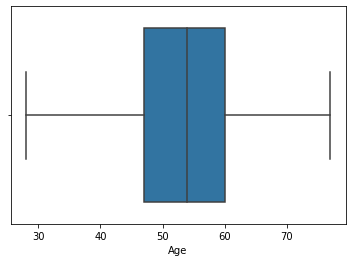

In [2561]:
sns.boxplot(df['Age'])
plt.show()

In [2562]:
#sns.boxplot(df['ChestPainType'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


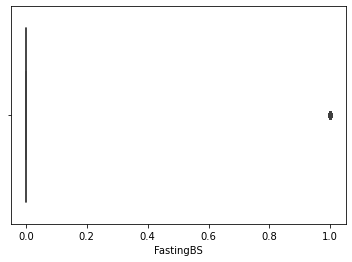

In [2563]:
sns.boxplot(df['FastingBS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


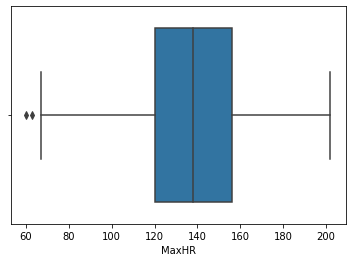

In [2564]:
sns.boxplot(df['MaxHR'])
plt.show()

In [2565]:
#sns.boxplot(df['ExerciseAngina'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


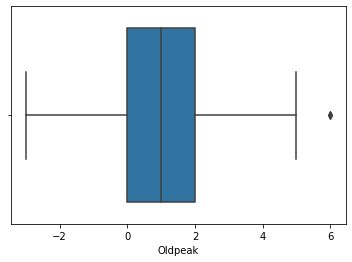

In [2566]:
sns.boxplot(df['Oldpeak'])
plt.show()

In [2567]:
#sns.boxplot(df['ST_Slope'])
plt.show()

In [2568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [2569]:
df=df.drop(['RestingBP','RestingECG','Cholesterol',],axis=1)

In [2570]:
df.head()

,Age,Sex,ChestPainType,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,0,172,0,0.0,2,0
1,49,0,2,0,156,0,1.0,1,1
2,37,1,1,0,98,0,0.0,2,0
3,48,0,0,0,108,1,2.0,1,1
4,54,1,2,0,122,0,0.0,2,0


In [2571]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.24489796 1.         0.33333333 ... 0.33333333 1.         0.        ]
 [0.42857143 0.         0.66666667 ... 0.44444444 0.5        1.        ]
 [0.18367347 1.         0.33333333 ... 0.33333333 1.         0.        ]
 ...
 [0.59183673 1.         0.         ... 0.44444444 0.5        1.        ]
 [0.59183673 0.         0.33333333 ... 0.33333333 0.5        1.        ]
 [0.20408163 1.         0.66666667 ... 0.33333333 1.         0.        ]]


In [2572]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(df)
from sklearn.preprocessing import normalize
normalize(df)

array([[0.22649171, 0.00566229, 0.00566229, ..., 0.        , 0.01132459,
        0.        ],
       [0.29962835, 0.        , 0.01222973, ..., 0.00611486, 0.00611486,
        0.00611486],
       [0.35311839, 0.00954374, 0.00954374, ..., 0.        , 0.01908748,
        0.        ],
       ...,
       [0.44402705, 0.00778995, 0.        , ..., 0.00778995, 0.00778995,
        0.00778995],
       [0.3112942 , 0.        , 0.0054613 , ..., 0.        , 0.0054613 ,
        0.0054613 ],
       [0.2145079 , 0.00564494, 0.01128989, ..., 0.        , 0.01128989,
        0.        ]])

In [2573]:
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

In [2574]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [2575]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_pred))

Accuracy 0.9184782608695652
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        74
           1       0.92      0.95      0.93       110

    accuracy                           0.92       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.92      0.92       184



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [2576]:
print("Accuracy",LR)

Accuracy 0.9184782608695652


In [2587]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 1, min_samples_leaf=1)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.9021739130434783
The confusion matrix of Random Forest Model is
[[ 63  11]
 [  7 103]]


In [2592]:
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)
Y_pred=nvclassifier.predict(X_test)
print("The Accuracy of the NB is",round(accuracy_score(Y_pred,y_test)*100,2))
print(metrics.confusion_matrix(y_test,Y_pred))

The Accuracy of the NB is 90.22
[[ 64  10]
 [  8 102]]


In [2593]:
from sklearn.metrics import classification_report
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_pred))

Accuracy 0.9021739130434783
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

